In [1]:
#importing the libiraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
#importing the datasets into dataframes
heroes_info = pd.read_csv('heroes_information.csv')
heroes_info = heroes_info.iloc[:,1:]
heroes_pwrs = pd.read_csv('super_hero_powers.csv')

In [3]:
#merging the two datasets
heroes = pd.merge(heroes_info, heroes_pwrs, how='inner', left_on='name', right_on='hero_names')


## what i want to investigate is if gender has any impact over the overall power of the superhero
## to determine the intensity of the power, we will calculate the number of powers each superhero has and then the higher would be the stronger

In [4]:
#first,some cleanup + manipulation

#replacing other unwanted values with Other
heroes.replace(to_replace='-',value='Other',inplace=True)
heroes['Publisher'].fillna('Other',inplace=True)

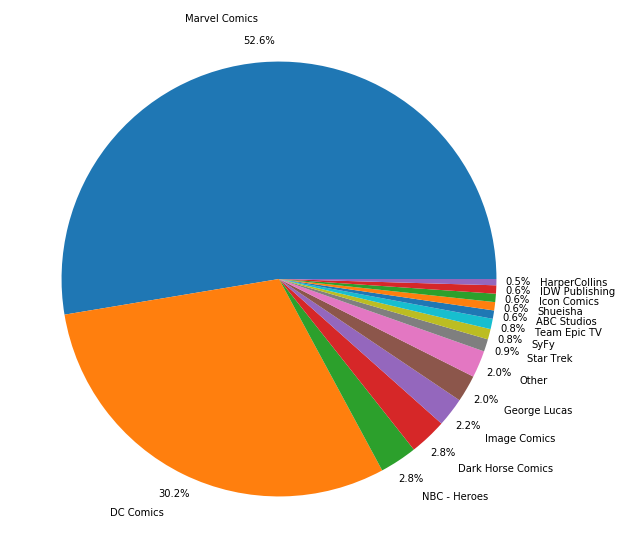

In [5]:
#visualizing the publishers distribution
publishers = heroes.Publisher.value_counts().head(15)
labels = np.array(publishers.index)
sizes = np.array((publishers / publishers.sum())*100)

plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, autopct= '%.1f%%', pctdistance=1.1, labeldistance=1.2)
plt.show()


#### Marvel and DC comics own most of the comics about superheroes

In [6]:
#converting the true and false to 1 and 0, that way we can calculte the sum and count the powers
heroes = heroes*1
heroes.loc[:, 'no_of_powers'] = heroes.iloc[:, 11:].sum(axis=1)
heroes.head(5)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,no_of_powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Other,good,441.0,...,0,0,0,0,0,0,0,0,0,7
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,0,0,0,0,0,0,0,0,0,16
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,0,0,0,0,0,0,0,0,0,1
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Other,bad,441.0,...,0,0,0,0,0,0,0,0,0,8
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,Other,bad,-99.0,...,0,0,0,0,0,0,0,0,0,14


In [7]:
powers = heroes[['hero_names','no_of_powers']].sort_values('no_of_powers',ascending=False)
powers.head(1)

,hero_names,no_of_powers
555,Spectre,49


#### It seems "Spectre" is the one with the most powers


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

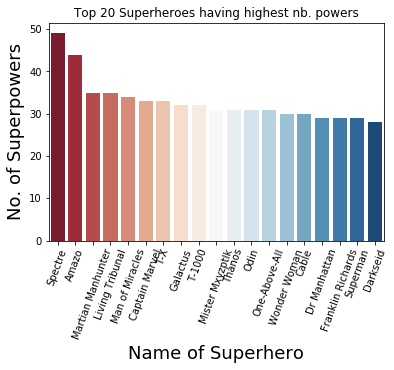

In [8]:
# top 20 superheroes based on nb of powers
f = sns.barplot(x=powers["hero_names"].head(20), y=powers['no_of_powers'].head(20), data=powers, palette='RdBu')
f.set_xlabel("Name of Superhero",fontsize=18)
f.set_ylabel("No. of Superpowers",fontsize=18)
f.set_title('Top 20 Superheroes having highest nb. powers')
plt.xticks(rotation=70)

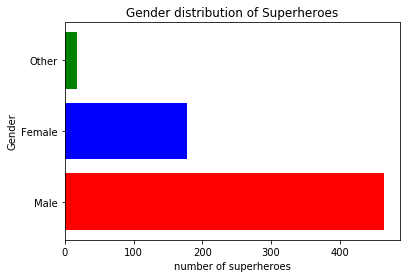

In [9]:
#visualizing the gender distribution
gender = heroes.Gender.value_counts()
plt.barh(gender.index, gender.values, color='rbg')
plt.xlabel('number of superheroes')
plt.ylabel('Gender')
plt.title('Gender distribution of Superheroes')
plt.show()

### male superheroes are more common than other genders

In [10]:
# most common super powers, creating a df containing only the sum of every superpowers
#that way we can find the most common ones
heroes_pwrs.isnull().any()
df_superhero = heroes_pwrs['hero_names']
heroes_pwrs.drop('hero_names', axis=1, inplace=True)
df = pd.DataFrame()

In [11]:
#counting the powers of each superhero then manipulating the data to get them in the required format
for i in heroes_pwrs.columns:
    df[i] = heroes[i].value_counts()

df = df.iloc[1:,:]
df = df.T
df = df.reset_index()
df['No_of_Superheroes']=df[1]
df = df.drop(1,axis=1)
df.rename(columns={'index': 'Super_Power_Name'}, inplace=True)
df = df.sort_values('No_of_Superheroes', ascending=False)

In [12]:
#We take only when more than 50 ssuperheroes have the superpower
df = df[df['No_of_Superheroes']>50]

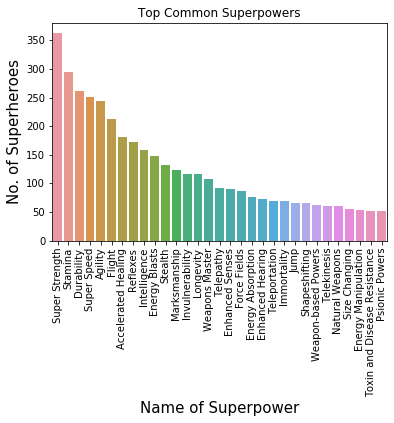

In [13]:
#visualizing the results
f=sns.barplot(x=df["Super_Power_Name"], y=df['No_of_Superheroes'], data=df)
f.set_xlabel("Name of Superpower",fontsize=15)
f.set_ylabel("No. of Superheroes",fontsize=15)
f.set_title('Top Common Superpowers')
plt.xticks(rotation=90)
plt.show()

#### super strength, stamina and durability seem to be the most common powers amongst other superheroes.

Text(0.5, 1, 'Correlation Heatmap')

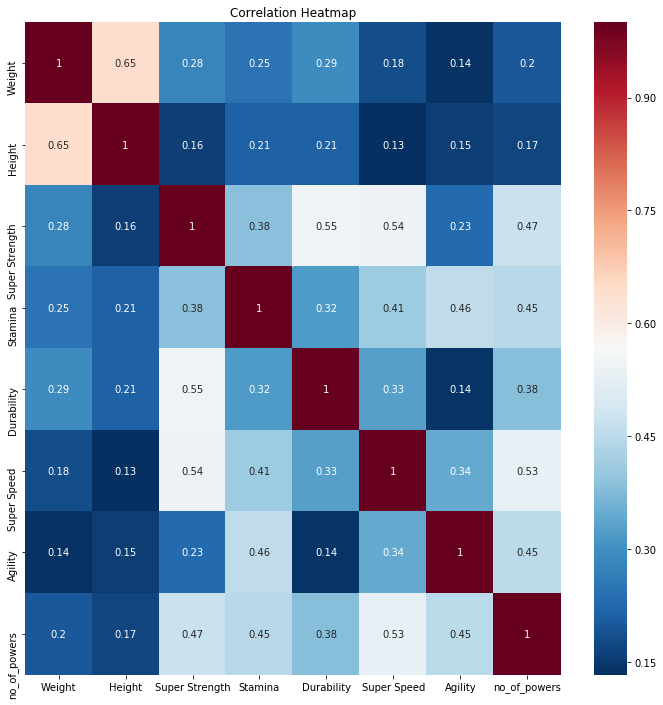

In [14]:
# subsetting a few cols with the most common powers and then correlations
subset = heroes.loc[:,['name','Gender','Weight', 'Height', 'Super Strength', 'Stamina', 'Durability', 'Super Speed', 'Agility', 'no_of_powers']]
corr = subset.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='RdBu_r')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Weight Distribution')

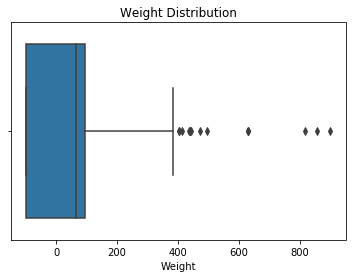

In [18]:
#checking for outliers
sns.boxplot(x=heroes.Weight)
plt.title('Weight Distribution')

Text(0.5, 1.0, 'Height Distribution')

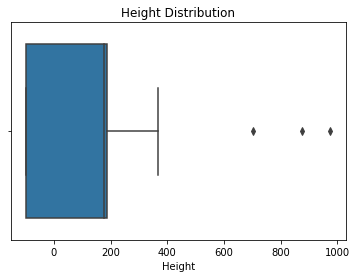

In [19]:
sns.boxplot(x=heroes.Height)
plt.title('Height Distribution')

Text(0.5, 1.0, 'powers distribution')

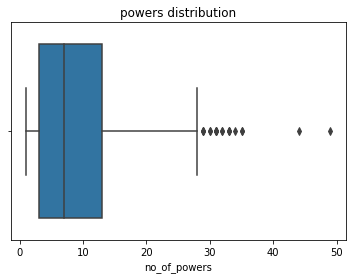

In [20]:
sns.boxplot(x=heroes['no_of_powers'])
plt.title('powers distribution')

#### although there seems to be some outliers in height and weight also in nb of powers, however we cannot get rid of them because the values are not natural to humans. however for instance if we dismiss a high weight, we will dismiss a superhero for instance A-Bomb which has a big weight and Groot a abnormal height.
#### there are some negative weight and height values which are impossible, we will replace those with the mean of the column below, just for the sake of not deleting any data

In [21]:
#handling negative values in height and weight
heroes.Weight = heroes.Weight.apply(lambda x: np.mean(heroes.Weight) if x<0 else x)
heroes.Height = heroes.Height.apply(lambda x: np.mean(heroes.Height) if x<0 else x)


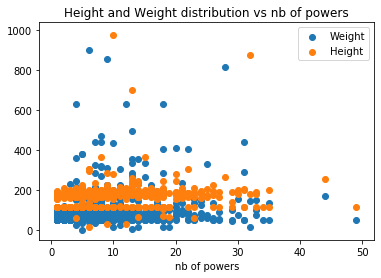

In [22]:
#scatter plot over correlations
plt.scatter(heroes['no_of_powers'], heroes.Weight, label='Weight' )
plt.scatter(heroes['no_of_powers'], heroes.Height, label='Height')
plt.legend()
plt.xlabel('nb of powers')
plt.title('Height and Weight distribution vs nb of powers')
plt.show()

### we do not clearly see a linear relationship between weight or height and nb of powers. although the correlation coeff is high, there might be a higher level relationship.

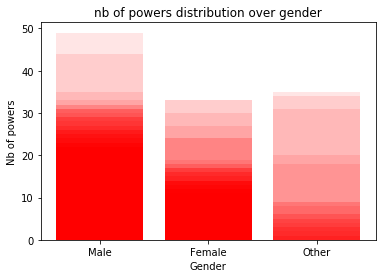

In [23]:
#gender and nb of powers
plt.bar(heroes['Gender'], heroes['no_of_powers'], color='red', alpha=0.1)
plt.xlabel('Gender')
plt.ylabel('Nb of powers')
plt.title('nb of powers distribution over gender')
plt.show()


#### seems like males dominate the chart with the nb of powers

#### hypothesis testing : we will check whether the gender is independent on the nb of powers with a confidence interval of 0.05
#### decided to use chi2 since we are dealing with categorical data

In [24]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(heroes['Gender'], heroes['no_of_powers']))
print("chi2 statistic {}, p-value {}".format(chi2,p))


chi2 statistic 107.4295419505234, p-value 0.004319353203359545


### with a small p-value, I will reject the null hypothesis that the gender is independent from the nb of powers. they could have a non linear relationship but we need more info on that. we can accept the alternate hypothesis for now and say they are dependent.